In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [108]:
data = pd.read_csv('Churn_Modelling.csv')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [110]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [111]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
df = data.copy()
df['HasCrCard'] = df['HasCrCard'].astype(bool)
df['IsActiveMember'] = df['IsActiveMember'].astype(bool)

In [113]:
# Quick data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  bool   
 11  IsActiveMember   10000 non-null  bool   
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: bool(2), float64(2), int64(7), object(3)
memory usage: 957.2+ KB


In [114]:
# Dropping irrelevant columns
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [115]:
attributes = ['Exited','EstimatedSalary','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember']
df[attributes].corrwith(df.Exited)

Exited             1.000000
EstimatedSalary    0.012097
CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
dtype: float64

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

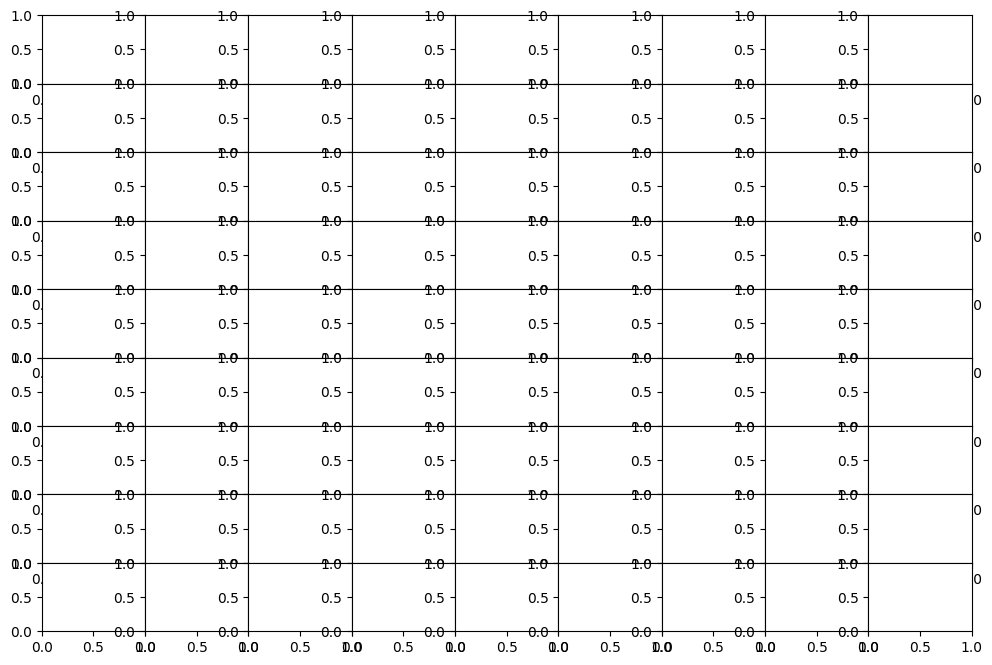

In [116]:
pd.plotting.scatter_matrix(df[attributes], figsize=(12,8))
plt.show()

In [117]:
# Creating new features
df['IncomeSavingsRatio'] = df['Balance'] / df['EstimatedSalary']
df['PercentOfLifeMembership'] = df['Tenure'] / df['Age']

In [118]:
attributes = ['Exited','EstimatedSalary','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember', 'IncomeSavingsRatio','PercentOfLifeMembership']
corrs = df[attributes].corrwith(df.Exited)
corrs

Exited                     1.000000
EstimatedSalary            0.012097
CreditScore               -0.027094
Age                        0.285323
Tenure                    -0.014001
Balance                    0.118533
NumOfProducts             -0.047820
HasCrCard                 -0.007138
IsActiveMember            -0.156128
IncomeSavingsRatio         0.025558
PercentOfLifeMembership   -0.121641
dtype: float64

In [119]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42, stratify=y)


In [120]:
# Create Pipeline to scale numerical features and encode categorical features
# PROBLEM 1
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer, make_column_selector
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error

In [121]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore'))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)), 
    (cat_pipeline, make_column_selector(dtype_include=object)), 
)

In [122]:
X_train_prep = preprocessing.fit_transform(X_train)

In [123]:
grid_svc_pipeline = make_pipeline(preprocessing, GridSearchCV(SVR(), param_grid={'kernel': ['linear','poly','rbf','sigmoid'],
                                                                            'C': np.arange(1.0, 1.5, .1)}, cv=3))

In [124]:
grid_svc_pipeline.fit(X_train[:5000], y_train[:5000])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002248A183620>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022480E3F110>)])),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=SVR(),
                              param_grid={'C': array([1. , 1.1, 1.2, 1.3, 1.4]),
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [125]:
churn_predictions = grid_svc_pipeline.predict(X_train)

In [126]:
churn_rmse = root_mean_squared_error(y_train, churn_predictions)
print(f'Default SVC RMSE on training data: {churn_rmse: .2f}')

Default SVC RMSE on training data:  0.34


In [127]:
churn_test_predictions = svc_pipeline.predict(X_test)
test_rmse = root_mean_squared_error(y_test, churn_test_predictions)
print(f'Default SVC RMSE on test data: {test_rmse: .2f}')

Default SVC RMSE on test data:  0.34


In [128]:
# PROBLEM 2 - REPLACE GRIDSEARCH WITH RANDOMSEARCH
from scipy.stats import randint
param_dists = {'kernel': ['linear','poly','rbf','sigmoid'], 'degree': randint(low=3,high=9), 'C': randint(low=1, high=3)}
rand_svc_pipeline = make_pipeline(preprocessing, RandomizedSearchCV(SVR(), param_distributions=param_dists))

In [129]:
rand_svc_pipeline.fit(X_train[:5000],y_train[:5000])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002248A183620>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022480E3F110>)])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=SVR(),
                                    param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022489583D40>,
                                                         'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002248A379DF0>,
                                                         'kernel': ['linear',
                                                                    'poly',
                                                                    'rbf',
                                                                    'sigmoid']}))])

In [130]:
churn_train_predictions = rand_svc_pipeline.predict(X_train)
train_rmse = root_mean_squared_error(y_train, churn_train_predictions)
print(f'RandomCV RMSE on training data: {train_rmse: .2f}')

RandomCV RMSE on training data:  0.34


In [131]:
churn_test_predictions = svc_pipeline.predict(X_test)
test_rmse = root_mean_squared_error(y_test, churn_test_predictions)
print(f'RandomCV RMSE on test data: {test_rmse: .2f}')

RandomCV RMSE on test data:  0.34
